# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [82]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [83]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    
'''
The above with statement will automatically close the file after the nested block of code. 
(Continue reading to see exactly how the close occurs.) The advantage of using a with statement 
is that it is guaranteed to close the file no matter how the nested block exits. If an exception 
occurs before the end of the block, it will close the file before the exception is caught by an 
outer exception handler. If the nested block were to contain a return statement, or a continue or 
break statement, the with statement would automatically close the file in those cases, too.
'''

'\nThe above with statement will automatically close the file after the nested block of code. \n(Continue reading to see exactly how the close occurs.) The advantage of using a with statement \nis that it is guaranteed to close the file no matter how the nested block exits. If an exception \noccurs before the end of the block, it will close the file before the exception is caught by an \nouter exception handler. If the nested block were to contain a return statement, or a continue or \nbreak statement, the with statement would automatically close the file in those cases, too.\n'

In [84]:
# show the first review
data[0]

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\

In [85]:
# convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
df.votes[:5]

0    {u'funny': 0, u'useful': 5, u'cool': 2}
1    {u'funny': 0, u'useful': 0, u'cool': 0}
2    {u'funny': 0, u'useful': 1, u'cool': 0}
3    {u'funny': 0, u'useful': 2, u'cool': 1}
4    {u'funny': 0, u'useful': 0, u'cool': 0}
Name: votes, dtype: object

In [86]:
#testing to understand data
#df.votes[0]["useful"]
#len(df.votes)
#df.votes.count()
#df.votes[9999]["useful"]
#df.head()

In [87]:
#evaluating while loops?

'''funny = []
i = 0
while i < len(df.votes):
    funny.append(df.votes[i]["funny"])
    i += 1
  
df.votes["useful"] = pd.DataFrame(funny)    
  '''  

'funny = []\ni = 0\nwhile i < len(df.votes):\n    funny.append(df.votes[i]["funny"])\n    i += 1\n  \ndf.votes["useful"] = pd.DataFrame(funny)    \n  '

In [88]:
# add DataFrame columns for cool, useful, and funny
#df.votes[m]["useful"] for m in df.votes]
df['funny'] = [row['votes']['funny'] for row in data]
#df.head()
df['useful'] = [row['votes']['useful'] for row in data]
df['cool'] =  [row['votes']['cool'] for row in data]



df.head()

,business_id,date,review_id,stars,text,type,user_id,votes,funny,useful,cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0


In [89]:
# drop the votes column and then display the head
df.drop('votes', axis=1)

,business_id,date,review_id,stars,text,type,user_id,funny,useful,cool
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,5,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,0,2,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,1,3,4
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,4,7,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [90]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
df.groupby('stars').mean()

,funny,useful,cool
stars,,,
1,1.056075,1.604806,0.576769
2,0.875944,1.563107,0.719525
3,0.694730,1.306639,0.788501
4,0.670448,1.395916,0.954623
5,0.608631,1.381780,0.944261


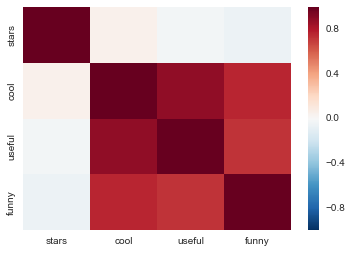

In [91]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

#Prof, why is does the above provide different results than doing a correlation matrix on the dataframe instead?

#sns.heatmap(df.corr())

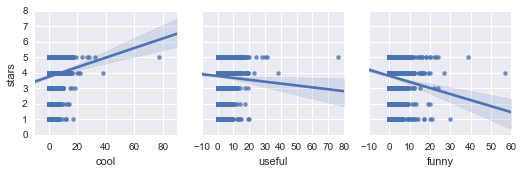

In [92]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
#single plot test 
#sns.lmplot(x='cool', y='stars', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
sns.pairplot(df, x_vars=['cool', 'useful', 'funny'], y_vars='stars', kind='reg')

#Prof, how come scatter_kws={'alpha':0.2} does not work for pairplot?


## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [93]:
feature_cols = ['cool', 'useful', 'funny']
X = df[feature_cols]
y = df[['stars']]

In [94]:
#y
#X

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

[ 3.83989479]
[[ 0.27435947 -0.14745239 -0.13567449]]


- the y intercept tells us that the graph starts at 3.7 which seems to make sense as reviews are generally weighted towards the top (above 3)
- The coef printed here are in the order of cool, useful and funny. It tells us that a single vote for cool, useful or funny is associated with a 0.14044461, -0.07768713 and -0.07768713 change in star rating. This makes sense as we would expect there to be very little change as the rating of the review usually does not have much to do with the rating of the place. It does also make sense that for reviews rated as useful that they would generally be associated with a lower review since they are probably usually poiting out the issues with the place. 

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [105]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [97]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #split into 4, random state allows you to get same result if trying to replicate results  
    linreg = LinearRegression() # assign estimator to var
    linreg.fit(X_train, y_train) 
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [98]:
# calculate RMSE with all three features
train_test_rmse(['cool', 'useful', 'funny'])


1.1733686274194506

## Task 6

Try removing some of the features and see if the RMSE improves.

In [99]:
train_test_rmse(['useful', 'funny'])

1.2007011358855331

## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [100]:
# new feature: review length 
df2 = df
df2.drop('votes', axis=1)
#df2.head()
df2['text_len'] = [len(row['text']) for row in data]
df2.head()

,business_id,date,review_id,stars,text,type,user_id,votes,funny,useful,cool,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",0,5,2,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}",0,2,1,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,469


In [101]:
# new features: 


In [102]:
# add new features to the model and calculate RMSE
train_test_rmse(['text_len','cool', 'useful', 'funny'])


1.1668346219497134

## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [108]:
train_test_split(X, y, random_state=123)
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# # fill the array with the mean value of y_test
# y_null.fill(y_test.mean())
# y_null

# compute null RMSE, if no one told us anything about the feature, this is what error we would get
np.sqrt(metrics.mean_squared_error(y_test, y_null))

3.9672660611559696